<a href="https://colab.research.google.com/github/MathQCCC25/Simulaci-n-Quintana_Celin/blob/main/Simulaci%C3%B3n.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

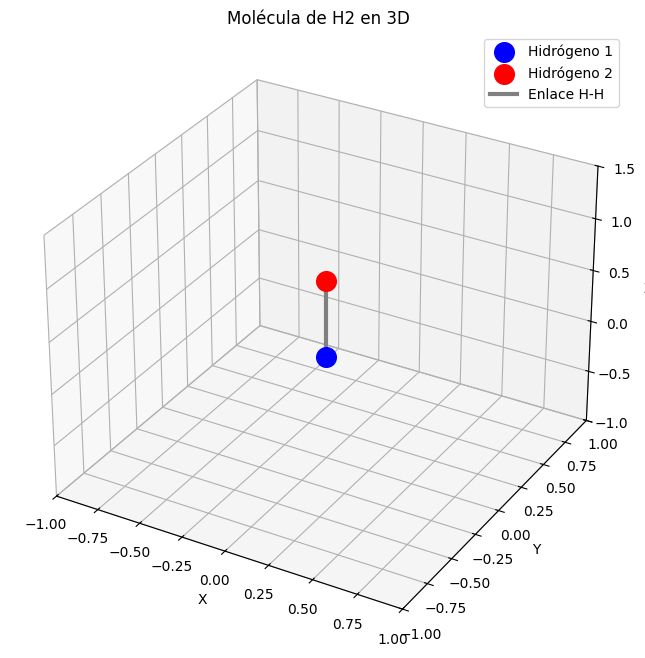

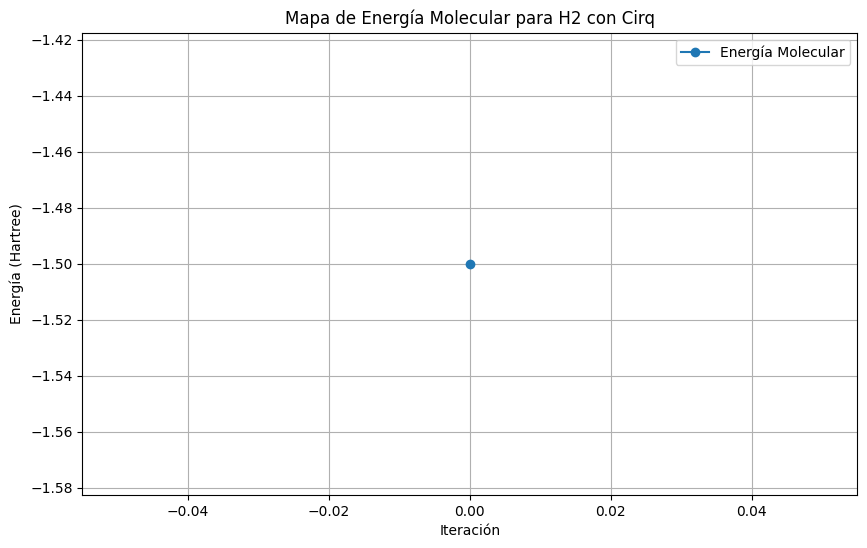

In [8]:

# Importar las librerías necesarias
import cirq
import numpy as np
import scipy.optimize
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Configurar el problema molecular para H2
def h2_hamiltonian():
    qubits = [cirq.GridQubit(0, 0), cirq.GridQubit(0, 1)]

    # Definir términos del Hamiltoniano de H2
    hamiltonian = [
(0.5, cirq.Z(qubits[0])),
(0.5, cirq.Z(qubits[1])),
(-0.5, cirq.Z(qubits[0]) * cirq.Z(qubits[1])),
(-0.25, cirq.X(qubits[0]) * cirq.X(qubits[1]))
    ]
    return qubits, hamiltonian

# Configurar el circuito cuántico para VQE
def build_vqe_circuit(qubits, params):
    circuit = cirq.Circuit()
# Aplicar rotaciones parametrizadas
    circuit.append(cirq.rx(params[0])(qubits[0]))
    circuit.append(cirq.rx(params[1])(qubits[1]))
# Agregar puerta de entrelazamiento
    circuit.append(cirq.CZ(qubits[0], qubits[1]))
    return circuit

# Ejecutar el cálculo cuántico con Cirq
def execute_vqe(hamiltonian, qubits, params):
    simulator = cirq.Simulator()
    circuit = build_vqe_circuit(qubits, params)
    result = simulator.simulate(circuit)
    state_vector = result.final_state_vector

# Calcular el valor esperado del Hamiltoniano
    energy = 0
    for coeff, operator in hamiltonian:
        expectation = simulator.simulate_expectation_values(circuit, observables=[operator])[0].real
        energy += coeff * expectation
    return energy

# Optimización con VQE
def optimize_vqe():
    qubits, hamiltonian = h2_hamiltonian()
    initial_params = np.random.rand(2) * 2 * np.pi

    def cost_function(params):
        return execute_vqe(hamiltonian, qubits, params)

    result = scipy.optimize.minimize(cost_function, initial_params, method='COBYLA')
    return result

# Ejecutar la optimización
opt_result = optimize_vqe()
optimized_params = opt_result.x
optimized_energy = opt_result.fun

# Visualización 3D de la molécula con Matplotlib
def plot_molecule_3d_matplotlib():
    fig = plt.figure(figsize=(8, 8))
    ax = fig.add_subplot(111, projection='3d')

    # Coordenadas de los átomos de H2
    atom1 = np.array([0, 0, 0])
    atom2 = np.array([0, 0, 0.74])  # Distancia típica H-H

    # Dibujar los átomos como esferas
    ax.scatter(*atom1, color='blue', s=200, label='Hidrógeno 1')
    ax.scatter(*atom2, color='red', s=200, label='Hidrógeno 2')

    # Dibujar el enlace como una línea
    ax.plot([atom1[0], atom2[0]], [atom1[1], atom2[1]], [atom1[2], atom2[2]], color='gray', linewidth=3, label='Enlace H-H')

    # Ajustar límites y etiquetas
    ax.set_xlim([-1, 1])
    ax.set_ylim([-1, 1])
    ax.set_zlim([-1, 1.5])
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')
    ax.legend()
    ax.set_title('Molécula de H2 en 3D')

    plt.show()

# Mostrar la molécula
plot_molecule_3d_matplotlib()

# Generar el mapa de energía molecular
plt.figure(figsize=(10, 6))
plt.plot([0], [optimized_energy], label='Energía Molecular', marker='o')
plt.title('Mapa de Energía Molecular para H2 con Cirq')
plt.xlabel('Iteración')
plt.ylabel('Energía (Hartree)')
plt.legend()
plt.grid()
plt.show()
